# 커피지수
- (스타벅스 + 커피빈) / (이디아 + 빽다방)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 한글 폰트 사용
# 폰트 설정
mpl.rc('font', family='Malgun Gothic') #family에 사용할 폰트를 넣음
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [2]:
from glob import glob

In [3]:
# 데이터 합치기
glob('./datas/소상공인시장진흥공단_상가(상권)정보*.csv')

['./datas\\소상공인시장진흥공단_상가(상권)정보_강원_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_경기_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_경남_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_경북_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_광주_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_대구_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_대전_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_부산_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_서울_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_세종_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_울산_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_인천_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_전남_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_전북_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_제주_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_충남_202009.csv',
 './datas\\소상공인시장진흥공단_상가(상권)정보_충북_202009.csv']

In [4]:
# 데이터 합쳐서 불러오기
station_files = glob('./datas/소상공인시장진흥공단_상가(상권)정보*.csv')
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_csv(file_name, sep='|', encoding='utf8')
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [5]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559655 entries, 0 to 96640
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      float64
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      float64
 34  동정보        object 
 

In [6]:
df = station_raw[['상호명','지점명','상권업종중분류명','상권업종소분류명','시도명','시군구명','건물명','지번주소','도로명주소','경도','위도']]
df.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,황진이,NaN,유흥주점,룸살롱/단란주점,강원도,원주시,NaN,강원도 원주시 중앙동 203-1,강원도 원주시 중앙로 61,127.952252,37.347773
1,용둔은영식당,NaN,한식,한식/백반/한정식,강원도,횡성군,NaN,강원도 횡성군 우천면 용둔리 571-12,강원도 횡성군 우천면 경강로 2730,128.059348,37.495197
2,아미식당,NaN,한식,한식/백반/한정식,강원도,홍천군,NaN,강원도 홍천군 서석면 풍암리 224-7,강원도 홍천군 서석면 풍암장터2길 49-13,128.187197,37.711402
3,산약초건강원,NaN,건강/미용식품,건강원,강원도,태백시,NaN,강원도 태백시 황지동 66-2,강원도 태백시 황지로 112,128.992063,37.168758
4,왕벌식당,NaN,한식,한식/백반/한정식,강원도,양구군,NaN,강원도 양구군 방산면 송현리 484-11,강원도 양구군 방산면 평화로 5432,127.955740,38.224635
5,대동호,NaN,일식/수산물,횟집,강원도,속초시,NaN,강원도 속초시 청호동 1341-1,강원도 속초시 설악금강대교로 11,128.594746,38.191008


In [7]:
# nan값 확인
df.isnull().values.any()

True

### nan값 공백으로 수정(fillna)

In [8]:
df.fillna('', inplace=True)
df.tail()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
96636,특미로,,한식,한식/백반/한정식,충청북도,제천시,,충청북도 제천시 봉양읍 미당리 825-1,충청북도 제천시 봉양읍 용두대로36길 17,128.159446,37.158754
96637,아줌마식당,,한식,한식/백반/한정식,충청북도,충주시,,충청북도 충주시 문화동 971,충청북도 충주시 사직산17길 28-12,127.926600,36.972237
96638,피자본,,패스트푸드,피자전문,충청북도,청주시 흥덕구,드림플러스,충청북도 청주시 흥덕구 가경동 1416-3,충청북도 청주시 흥덕구 2순환로 1233,127.431131,36.626212
96639,카페,라벨르디저트,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,,충청북도 청주시 서원구 수곡동 626,충청북도 청주시 서원구 수곡로 112-1,127.469841,36.621037
96640,카페,벧엘무인신용카드,커피점/카페,커피전문점/카페/다방,충청북도,영동군,,충청북도 영동군 양강면 괴목리 690,충청북도 영동군 양강면 묘동4길 9-11,127.749886,36.146793


In [9]:
df = df[(df['상권업종중분류명']=='커피점/카페')]
df.tail()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
96619,커피팜스,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,,충청북도 청주시 서원구 사직동 139-14,충청북도 청주시 서원구 사운로174번길 35-1,127.480678,36.645616
96620,커피랩KBS,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,문화동센트럴칸타빌,충청북도 청주시 상당구 문화동 118,충청북도 청주시 상당구 용담로 7,127.492144,36.633175
96635,군밤카페,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,,충청북도 청주시 흥덕구 가경동 1064,충청북도 청주시 흥덕구 풍년로180번길 19,127.432589,36.628652
96639,카페,라벨르디저트,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,,충청북도 청주시 서원구 수곡동 626,충청북도 청주시 서원구 수곡로 112-1,127.469841,36.621037
96640,카페,벧엘무인신용카드,커피점/카페,커피전문점/카페/다방,충청북도,영동군,,충청북도 영동군 양강면 괴목리 690,충청북도 영동군 양강면 묘동4길 9-11,127.749886,36.146793


In [10]:
df

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
20,펠로톤,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 성내동 21,강원도 강릉시 임영로 115,128.893468,37.751919
23,키즈까페아이사랑,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 입암동 708-3,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
30,상유재카페,,커피점/카페,커피전문점/카페/다방,강원도,정선군,,강원도 정선군 정선읍 봉양리 217-10,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
213,동물과사람,,커피점/카페,애견카페,강원도,원주시,,강원도 원주시 단구동 1526-4,강원도 원주시 천매봉길 117,127.943047,37.326277
274,카페비엔또,,커피점/카페,커피전문점/카페/다방,강원도,영월군,영월의료원,강원도 영월군 영월읍 영흥리 1072,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503
...,...,...,...,...,...,...,...,...,...,...,...
96619,커피팜스,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,,충청북도 청주시 서원구 사직동 139-14,충청북도 청주시 서원구 사운로174번길 35-1,127.480678,36.645616
96620,커피랩KBS,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,문화동센트럴칸타빌,충청북도 청주시 상당구 문화동 118,충청북도 청주시 상당구 용담로 7,127.492144,36.633175
96635,군밤카페,,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,,충청북도 청주시 흥덕구 가경동 1064,충청북도 청주시 흥덕구 풍년로180번길 19,127.432589,36.628652
96639,카페,라벨르디저트,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,,충청북도 청주시 서원구 수곡동 626,충청북도 청주시 서원구 수곡로 112-1,127.469841,36.621037


In [11]:
#df_stbu.to_excel('전국상권스벅.xlsx')

In [12]:
df = df[(df['상권업종소분류명']=='커피전문점/카페/다방')]
df.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
20,펠로톤,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 성내동 21,강원도 강릉시 임영로 115,128.893468,37.751919
23,키즈까페아이사랑,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 입암동 708-3,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
30,상유재카페,,커피점/카페,커피전문점/카페/다방,강원도,정선군,,강원도 정선군 정선읍 봉양리 217-10,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
274,카페비엔또,,커피점/카페,커피전문점/카페/다방,강원도,영월군,영월의료원,강원도 영월군 영월읍 영흥리 1072,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503
623,커피갤러리,,커피점/카페,커피전문점/카페/다방,강원도,영월군,,강원도 영월군 주천면 주천리 1144-1,강원도 영월군 주천면 주천로 73,128.267069,37.270039
639,산내들다방,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 성남동 267-2,강원도 강릉시 임영로 103-1,128.894411,37.751083


In [13]:
# 인덱스 재 설정
df = df.reset_index(drop=True)
df.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,펠로톤,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 성내동 21,강원도 강릉시 임영로 115,128.893468,37.751919
1,키즈까페아이사랑,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 입암동 708-3,강원도 강릉시 성덕포남로 45-8,128.919456,37.759315
2,상유재카페,,커피점/카페,커피전문점/카페/다방,강원도,정선군,,강원도 정선군 정선읍 봉양리 217-10,강원도 정선군 정선읍 정선로 1323,128.660805,37.379458
3,카페비엔또,,커피점/카페,커피전문점/카페/다방,강원도,영월군,영월의료원,강원도 영월군 영월읍 영흥리 1072,강원도 영월군 영월읍 중앙1로 59,128.465690,37.186503
4,커피갤러리,,커피점/카페,커피전문점/카페/다방,강원도,영월군,,강원도 영월군 주천면 주천리 1144-1,강원도 영월군 주천면 주천로 73,128.267069,37.270039
5,산내들다방,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 성남동 267-2,강원도 강릉시 임영로 103-1,128.894411,37.751083


## 스타벅스 데이터
- case=False(옵션)값을 주어 대소문자 구분없이 모두 뽑게 함

In [14]:
df_stbu = df[df['상호명'].str.contains('스타벅스|STARBUCKS|스타박스', case=False)]
df_stbu.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
13,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단계동 833-4,강원도 원주시 금불1길 28-5,127.931032,37.348466
157,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,대명비발디파크,강원도 홍천군 서면 팔봉리 1290-2,강원도 홍천군 서면 한치골길 262,127.687273,37.652324
384,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,델피노골프&리조트,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128
425,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632-3,강원도 춘천시 서부대성로 243-1,127.745087,37.872760
662,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,스타벅스,강원도 속초시 금호동 484-6,강원도 속초시 중앙로 123,128.589463,38.202621
740,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 포남동 1138-5,강원도 강릉시 경강로 2194-1,128.904526,37.760728


In [15]:
# 스타벅스 인덱스 재설정
df_stbu = df_stbu.reset_index(drop=True)
df_stbu.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단계동 833-4,강원도 원주시 금불1길 28-5,127.931032,37.348466
1,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,대명비발디파크,강원도 홍천군 서면 팔봉리 1290-2,강원도 홍천군 서면 한치골길 262,127.687273,37.652324
2,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,델피노골프&리조트,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128
3,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632-3,강원도 춘천시 서부대성로 243-1,127.745087,37.872760
4,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,스타벅스,강원도 속초시 금호동 484-6,강원도 속초시 중앙로 123,128.589463,38.202621
5,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 포남동 1138-5,강원도 강릉시 경강로 2194-1,128.904526,37.760728


In [16]:
df_stbu['상호'] = '스타벅스'
df_stbu.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도,상호
0,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단계동 833-4,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스
1,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,대명비발디파크,강원도 홍천군 서면 팔봉리 1290-2,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스
2,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,델피노골프&리조트,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스
3,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632-3,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스
4,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,스타벅스,강원도 속초시 금호동 484-6,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스
5,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 포남동 1138-5,강원도 강릉시 경강로 2194-1,128.904526,37.760728,스타벅스


## 이디아 데이터

In [17]:
df_eda = df[df['상호명'].str.contains('이디아|이디야|EDIYA', case=False)]
df_eda.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
37,이디야커피,우두동점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 우두동 707-35,강원도 춘천시 충열로 39,127.732714,37.899493
114,이디야커피,철원와수점,커피점/카페,커피전문점/카페/다방,강원도,철원군,르방베이커리,강원도 철원군 서면 와수리 1147-15,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147
143,이디야커피,하이원점,커피점/카페,커피전문점/카페/다방,강원도,정선군,마운틴콘도미니엄,강원도 정선군 고한읍 고한리 438,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488
276,이디야에스프레소,,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 조양동 37-14,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075
284,이디야커피,춘천애막골점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 729-1,강원도 춘천시 후석로186번길 18,127.754289,37.867310
302,이디야커피,무실점,커피점/카페,커피전문점/카페/다방,강원도,원주시,무실동주민센터,강원도 원주시 무실동 1641-1,강원도 원주시 시청로 70,127.926370,37.337388


In [18]:
# 이디아 인덱스 재설정
df_eda = df_eda.reset_index(drop=True)
df_eda.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,이디야커피,우두동점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 우두동 707-35,강원도 춘천시 충열로 39,127.732714,37.899493
1,이디야커피,철원와수점,커피점/카페,커피전문점/카페/다방,강원도,철원군,르방베이커리,강원도 철원군 서면 와수리 1147-15,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147
2,이디야커피,하이원점,커피점/카페,커피전문점/카페/다방,강원도,정선군,마운틴콘도미니엄,강원도 정선군 고한읍 고한리 438,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488
3,이디야에스프레소,,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 조양동 37-14,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075
4,이디야커피,춘천애막골점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 729-1,강원도 춘천시 후석로186번길 18,127.754289,37.867310
5,이디야커피,무실점,커피점/카페,커피전문점/카페/다방,강원도,원주시,무실동주민센터,강원도 원주시 무실동 1641-1,강원도 원주시 시청로 70,127.926370,37.337388


In [19]:
df_eda['상호'] = '이디아'
df_eda.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도,상호
0,이디야커피,우두동점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 우두동 707-35,강원도 춘천시 충열로 39,127.732714,37.899493,이디아
1,이디야커피,철원와수점,커피점/카페,커피전문점/카페/다방,강원도,철원군,르방베이커리,강원도 철원군 서면 와수리 1147-15,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147,이디아
2,이디야커피,하이원점,커피점/카페,커피전문점/카페/다방,강원도,정선군,마운틴콘도미니엄,강원도 정선군 고한읍 고한리 438,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488,이디아
3,이디야에스프레소,,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 조양동 37-14,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075,이디아
4,이디야커피,춘천애막골점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 729-1,강원도 춘천시 후석로186번길 18,127.754289,37.867310,이디아
5,이디야커피,무실점,커피점/카페,커피전문점/카페/다방,강원도,원주시,무실동주민센터,강원도 원주시 무실동 1641-1,강원도 원주시 시청로 70,127.926370,37.337388,이디아


## 커피빈 지점 데이터 

In [20]:
df_cfbn = df[df['상호명'].str.contains('커피빈|COFFEEBEAN', case=False)]
df_cfbn.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
2093,커피빈,,커피점/카페,커피전문점/카페/다방,강원도,동해시,커피빈,강원도 동해시 묵호진동 2-274,강원도 동해시 일출로 107,129.118963,37.552715
2422,커피빈,코리아원주AK플라자점,커피점/카페,커피전문점/카페/다방,강원도,원주시,AK플라자,강원도 원주시 단계동 1123,강원도 원주시 봉화로 1,127.927626,37.345679
3477,커피빈,곰씨네,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 동내면 거두리 908-6,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311
4529,커피빈,,커피점/카페,커피전문점/카페/다방,경기도,이천시,,경기도 이천시 중리동 463-11,경기도 이천시 남천로 93,127.447687,37.276730
4750,커피빈,코리아수원인계점,커피점/카페,커피전문점/카페/다방,경기도,수원시 팔달구,학산빌딩,경기도 수원시 팔달구 인계동 1038-4,경기도 수원시 팔달구 권광로 195,127.032669,37.264938
4856,커피빈코리아일산원마운트점,코리아일산원마운트점,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산서구,원마운트,경기도 고양시 일산서구 대화동 2606,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544


In [21]:
# 커피빈 인덱스 재설정
df_cfbn = df_cfbn.reset_index(drop=True)
df_cfbn.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,커피빈,,커피점/카페,커피전문점/카페/다방,강원도,동해시,커피빈,강원도 동해시 묵호진동 2-274,강원도 동해시 일출로 107,129.118963,37.552715
1,커피빈,코리아원주AK플라자점,커피점/카페,커피전문점/카페/다방,강원도,원주시,AK플라자,강원도 원주시 단계동 1123,강원도 원주시 봉화로 1,127.927626,37.345679
2,커피빈,곰씨네,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 동내면 거두리 908-6,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311
3,커피빈,,커피점/카페,커피전문점/카페/다방,경기도,이천시,,경기도 이천시 중리동 463-11,경기도 이천시 남천로 93,127.447687,37.276730
4,커피빈,코리아수원인계점,커피점/카페,커피전문점/카페/다방,경기도,수원시 팔달구,학산빌딩,경기도 수원시 팔달구 인계동 1038-4,경기도 수원시 팔달구 권광로 195,127.032669,37.264938
5,커피빈코리아일산원마운트점,코리아일산원마운트점,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산서구,원마운트,경기도 고양시 일산서구 대화동 2606,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544


In [22]:
df_cfbn['상호'] = '커피빈'
df_cfbn.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도,상호
0,커피빈,,커피점/카페,커피전문점/카페/다방,강원도,동해시,커피빈,강원도 동해시 묵호진동 2-274,강원도 동해시 일출로 107,129.118963,37.552715,커피빈
1,커피빈,코리아원주AK플라자점,커피점/카페,커피전문점/카페/다방,강원도,원주시,AK플라자,강원도 원주시 단계동 1123,강원도 원주시 봉화로 1,127.927626,37.345679,커피빈
2,커피빈,곰씨네,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 동내면 거두리 908-6,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311,커피빈
3,커피빈,,커피점/카페,커피전문점/카페/다방,경기도,이천시,,경기도 이천시 중리동 463-11,경기도 이천시 남천로 93,127.447687,37.276730,커피빈
4,커피빈,코리아수원인계점,커피점/카페,커피전문점/카페/다방,경기도,수원시 팔달구,학산빌딩,경기도 수원시 팔달구 인계동 1038-4,경기도 수원시 팔달구 권광로 195,127.032669,37.264938,커피빈
5,커피빈코리아일산원마운트점,코리아일산원마운트점,커피점/카페,커피전문점/카페/다방,경기도,고양시 일산서구,원마운트,경기도 고양시 일산서구 대화동 2606,경기도 고양시 일산서구 한류월드로 300,126.754507,37.664544,커피빈


## 빽다방 지점 데이터 

In [23]:
df_pabang = df[df['상호명'].str.contains('빽다방|PAIKSCOFFEE', case=False)]
df_pabang.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
112,빽다방,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 일산동 71-1,강원도 원주시 무실로12번길 33,127.947781,37.350006
583,빽다방,춘천석사CGV점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 888-4,강원도 춘천시 지석로 85,127.744832,37.851125
660,빽다방,강릉금학점,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 금학동 53-2,강원도 강릉시 신대학길 14,128.894954,37.752800
759,빽다방,삼척대학로점,커피점/카페,커피전문점/카페/다방,강원도,삼척시,,강원도 삼척시 당저동 166-8,강원도 삼척시 대학로 23-8,129.163077,37.443281
1297,빽다방,원주단구GS점,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단구동 1515-4,강원도 원주시 남원로534번길 20,127.948675,37.330389
1303,빽다방,강원대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632,강원도 춘천시 서부대성로239번길 4,127.744915,37.873003


In [24]:
# 빽다방 인덱스 재설정
df_pabang = df_pabang.reset_index(drop=True)
df_pabang.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
0,빽다방,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 일산동 71-1,강원도 원주시 무실로12번길 33,127.947781,37.350006
1,빽다방,춘천석사CGV점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 888-4,강원도 춘천시 지석로 85,127.744832,37.851125
2,빽다방,강릉금학점,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 금학동 53-2,강원도 강릉시 신대학길 14,128.894954,37.752800
3,빽다방,삼척대학로점,커피점/카페,커피전문점/카페/다방,강원도,삼척시,,강원도 삼척시 당저동 166-8,강원도 삼척시 대학로 23-8,129.163077,37.443281
4,빽다방,원주단구GS점,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단구동 1515-4,강원도 원주시 남원로534번길 20,127.948675,37.330389
5,빽다방,강원대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632,강원도 춘천시 서부대성로239번길 4,127.744915,37.873003


In [25]:
df_pabang.tail(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도
492,빽다방,충주신연수리첼점,커피점/카페,커피전문점/카페/다방,충청북도,충주시,,충청북도 충주시 연수동 1355,충청북도 충주시 번영대로 216,127.941571,36.986853
493,빽다방,청주분평중앙점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 서원구,해피존,충청북도 청주시 서원구 분평동 1370,충청북도 청주시 서원구 1순환로1107번길 20,127.489878,36.607255
494,빽다방,청주율량중앙점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 청원구,,충청북도 청주시 청원구 주성동 338,충청북도 청주시 청원구 율량로 104,127.497259,36.672011
495,빽다방,청주지웰시티점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,,충청북도 청주시 흥덕구 복대동 288-124,충청북도 청주시 흥덕구 대농로 39,127.426909,36.642332
496,빽다방,청주금천광장점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 상당구,스타피아,충청북도 청주시 상당구 용담동 375,충청북도 청주시 상당구 산성로98번길 35,127.505733,36.631051
497,빽다방,청주오송점,커피점/카페,커피전문점/카페/다방,충청북도,청주시 흥덕구,청송빌딩,충청북도 청주시 흥덕구 오송읍 만수리 517,충청북도 청주시 흥덕구 오송읍 오송생명5로 179,127.330310,36.630536


In [26]:
df_pabang['상호'] = '빽다방'
df_pabang.head(6)

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도,상호
0,빽다방,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 일산동 71-1,강원도 원주시 무실로12번길 33,127.947781,37.350006,빽다방
1,빽다방,춘천석사CGV점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 석사동 888-4,강원도 춘천시 지석로 85,127.744832,37.851125,빽다방
2,빽다방,강릉금학점,커피점/카페,커피전문점/카페/다방,강원도,강릉시,,강원도 강릉시 금학동 53-2,강원도 강릉시 신대학길 14,128.894954,37.752800,빽다방
3,빽다방,삼척대학로점,커피점/카페,커피전문점/카페/다방,강원도,삼척시,,강원도 삼척시 당저동 166-8,강원도 삼척시 대학로 23-8,129.163077,37.443281,빽다방
4,빽다방,원주단구GS점,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단구동 1515-4,강원도 원주시 남원로534번길 20,127.948675,37.330389,빽다방
5,빽다방,강원대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632,강원도 춘천시 서부대성로239번길 4,127.744915,37.873003,빽다방


### 커피 데이터 합치기

In [27]:
cf = pd.concat([df_stbu, df_eda, df_pabang, df_cfbn])
cf.head()

,상호명,지점명,상권업종중분류명,상권업종소분류명,시도명,시군구명,건물명,지번주소,도로명주소,경도,위도,상호
0,스타벅스,,커피점/카페,커피전문점/카페/다방,강원도,원주시,,강원도 원주시 단계동 833-4,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스
1,스타벅스,오션월드2호점,커피점/카페,커피전문점/카페/다방,강원도,홍천군,대명비발디파크,강원도 홍천군 서면 팔봉리 1290-2,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스
2,스타벅스,대명델피노리조트점,커피점/카페,커피전문점/카페/다방,강원도,고성군,델피노골프&리조트,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스
3,스타벅스,강대점,커피점/카페,커피전문점/카페/다방,강원도,춘천시,,강원도 춘천시 효자동 632-3,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스
4,스타벅스,속초중앙로점,커피점/카페,커피전문점/카페/다방,강원도,속초시,스타벅스,강원도 속초시 금호동 484-6,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스


In [28]:
cf = cf[['상호명','지점명','시도명','시군구명','도로명주소','경도','위도','상호']]
cf = cf.fillna(' ')
cf

,상호명,지점명,시도명,시군구명,도로명주소,경도,위도,상호
0,스타벅스,,강원도,원주시,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스
1,스타벅스,오션월드2호점,강원도,홍천군,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스
2,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스
3,스타벅스,강대점,강원도,춘천시,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스
4,스타벅스,속초중앙로점,강원도,속초시,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스
...,...,...,...,...,...,...,...,...
379,커피빈,파비뇽점,충청북도,청주시 흥덕구,충청북도 청주시 흥덕구 월명로 212,127.455569,36.653705,커피빈
380,커피빈,,충청북도,제천시,충청북도 제천시 내제로 74,128.203104,37.136042,커피빈
381,커피빈,코리아청주점,충청북도,청주시 상당구,충청북도 청주시 상당구 상당로69번길 20,127.489295,36.634532,커피빈
382,커피빈,,충청북도,음성군,충청북도 음성군 금왕읍 무극로 281,127.592804,36.993018,커피빈


### 합쳐진 데이터에서 해당 점포가 구마다 몇 개있는 지 알기 위해 점포 수를 1로 넣음

In [29]:
cf['점포'] = 1
cf.head()

,상호명,지점명,시도명,시군구명,도로명주소,경도,위도,상호,점포
0,스타벅스,,강원도,원주시,강원도 원주시 금불1길 28-5,127.931032,37.348466,스타벅스,1
1,스타벅스,오션월드2호점,강원도,홍천군,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,스타벅스,1
2,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,스타벅스,1
3,스타벅스,강대점,강원도,춘천시,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,스타벅스,1
4,스타벅스,속초중앙로점,강원도,속초시,강원도 속초시 중앙로 123,128.589463,38.202621,스타벅스,1


### 합쳐진 데이터 피벗 테이블 만들기
- 해당 데이터로 하단의 지도 데이터의 시군명의 중복 출력을 방지함

In [30]:
cf = pd.pivot_table(cf,
            index= ['시도명', '시군구명'],
            columns= ['상호'],
            values= ['점포'], aggfunc='sum')
cf.head()

점포                
상호        빽다방 스타벅스   이디아  커피빈
시도명 시군구명                     
강원도 강릉시   2.0  5.0  15.0  NaN
    고성군   NaN  2.0   1.0  NaN
    동해시   1.0  1.0   1.0  1.0
    삼척시   2.0  1.0   1.0  NaN
    속초시   NaN  4.0   8.0  NaN

In [31]:
cf.fillna(0.0, inplace=True)
cf.tail()

점포                 
상호            빽다방  스타벅스   이디아  커피빈
시도명  시군구명                         
충청북도 청주시 상당구  2.0   5.0   9.0  1.0
     청주시 서원구  3.0   4.0   6.0  0.0
     청주시 청원구  1.0   3.0   8.0  0.0
     청주시 흥덕구  4.0  10.0  14.0  1.0
     충주시      1.0   6.0   6.0  0.0

In [32]:
cf.reset_index(inplace=True)
cf.head()

시도명 시군구명   점포                
상호            빽다방 스타벅스   이디아  커피빈
0   강원도  강릉시  2.0  5.0  15.0  0.0
1   강원도  고성군  0.0  2.0   1.0  0.0
2   강원도  동해시  1.0  1.0   1.0  1.0
3   강원도  삼척시  2.0  1.0   1.0  0.0
4   강원도  속초시  0.0  4.0   8.0  0.0

In [33]:
#cf.to_excel('전국')

### 지도 id뽑기

In [34]:
si_name = [None] * len(cf)

for n in  cf.index:
    if  cf['시군구명'][n] == '고성군':
        if cf['시도명'][n] == '강원도':
            si_name[n] = '고성(강원)'
        else:
            si_name[n] = '고성(경남)'

    elif  cf['시도명'][n] in ['서울특별시', '인천광역시', '울산광역시', '부산광역시', '대구광역시', '대전광역시', '광주광역시']:
        if len(cf['시군구명'][n]) == 2:
            si_name[n] = cf['시도명'][n][:2] + ' ' +  cf['시군구명'][n]
        else:
            si_name[n] =  cf['시도명'][n][:2] + ' ' +  cf['시군구명'][n][:-1]
    
    elif len(cf['시군구명'][n].split()) == 2:
        si_name[n] = cf['시군구명'][n].split()[0][:-1] + ' ' + cf['시군구명'][n].split()[1][:-1]

    elif cf['시군구명'][n] in ['창원시 마산합포구', '창원시 마산회원구']:
        si_name[n] = cf['시군구명'][n][:2] + ' ' + cf['시군구명'][n][6:-1]

    else:
        si_name[n] = cf['시군구명'][n].split()[0][:-1]

print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양 덕양', '고양 일산동', '고양 일산서', '과천', '광명', '광주', '구리', '군포', '김포', '남양주', '동두천', '부천', '성남 분당', '성남 수정', '성남 중원', '수원', '수원 권선', '수원 영통', '수원 장안', '수원 팔달', '시흥', '안산', '안산 단원', '안산 상록', '안성', '안양 동안', '안양 만안', '양주', '양평', '여주', '연천', '오산', '용인', '용인 기흥', '용인 수지', '용인 처인', '의왕', '의정부', '이천', '파주', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '밀양', '사천', '산청', '양산', '진주', '창녕', '창원', '창원 마산합포', '창원 마산회원', '창원 성산', '창원 의창', '창원 진해', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '김천', '문경', '봉화', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울진', '청도', '청송', '칠곡', '포항 남', '포항 북', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕', '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '부산 기장', '부산 남구', '부산 동구', '부산 동래', '부산 부산진', '부산 북구', '부산 사상', '부산 사하', '부산 서구', '부산 수영', '부산 연제', '부

In [35]:
cf['ID'] = si_name

In [36]:
cf

시도명     시군구명   점포                       ID
상호                  빽다방  스타벅스   이디아  커피빈        
0     강원도      강릉시  2.0   5.0  15.0  0.0      강릉
1     강원도      고성군  0.0   2.0   1.0  0.0  고성(강원)
2     강원도      동해시  1.0   1.0   1.0  1.0      동해
3     강원도      삼척시  2.0   1.0   1.0  0.0      삼척
4     강원도      속초시  0.0   4.0   8.0  0.0      속초
..    ...      ...  ...   ...   ...  ...     ...
236  충청북도  청주시 상당구  2.0   5.0   9.0  1.0   청주 상당
237  충청북도  청주시 서원구  3.0   4.0   6.0  0.0   청주 서원
238  충청북도  청주시 청원구  1.0   3.0   8.0  0.0   청주 청원
239  충청북도  청주시 흥덕구  4.0  10.0  14.0  1.0   청주 흥덕
240  충청북도      충주시  1.0   6.0   6.0  0.0      충주

[241 rows x 7 columns]

In [37]:
"""ppts = pd.DataFrame({
    '시도':cf['시도명'],
    '시군구':cf['시군구명']
})
ppts"""

"ppts = pd.DataFrame({\n    '시도':cf['시도명'],\n    '시군구':cf['시군구명']\n})\nppts"

In [38]:
cf.head()

시도명 시군구명   점포                      ID
상호            빽다방 스타벅스   이디아  커피빈        
0   강원도  강릉시  2.0  5.0  15.0  0.0      강릉
1   강원도  고성군  0.0  2.0   1.0  0.0  고성(강원)
2   강원도  동해시  1.0  1.0   1.0  1.0      동해
3   강원도  삼척시  2.0  1.0   1.0  0.0      삼척
4   강원도  속초시  0.0  4.0   8.0  0.0      속초

In [39]:
# 다단으로 구성된 index를 다시 초기화
tmp_columns = [cf.columns.get_level_values(0)[n] + cf.columns.get_level_values(1)[n] for n in range(0, len(cf.columns.get_level_values(0)))]
# index가 초기화된 컬럼들로 다시 변경 = 다단으로 표시된 컬럼을 하나로 합침
cf.columns = tmp_columns
cf.head()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,ID
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원)
2,강원도,동해시,1.0,1.0,1.0,1.0,동해
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척
4,강원도,속초시,0.0,4.0,8.0,0.0,속초


In [40]:
# 커피지수 만들기
cf_list = []

for i in cf.index:
    if cf['점포빽다방'][i] + cf['점포이디아'][i] == 0:
        cf_list.append(0)
    else:
        cf_list.append((cf['점포스타벅스'][i] + cf['점포커피빈'][i]) / ( cf['점포빽다방'][i] + cf['점포이디아'][i]))
print(cf_list)

[0.29411764705882354, 2.0, 1.0, 0.3333333333333333, 0.5, 0.0, 0.0, 0.6875, 0.3333333333333333, 0.0, 0.0, 0.3548387096774194, 1.0, 1.0, 0.5, 0.0, 0.0, 0.0, 0.8076923076923077, 1.2352941176470589, 1.6153846153846154, 2.0, 0.9166666666666666, 0.2777777777777778, 0.25, 0.35294117647058826, 0.5333333333333333, 0.2653061224489796, 1.3333333333333333, 0.3333333333333333, 1.8571428571428572, 0.3333333333333333, 0.3333333333333333, 0.0, 0.5625, 0.6086956521739131, 0.6, 0.9411764705882353, 0.37037037037037035, 0.25, 0.11538461538461539, 0.08333333333333333, 1.0, 0.8888888888888888, 0.35714285714285715, 0.4666666666666667, 0.5, 0.6, 2.0, 0.6, 0.0, 0.5555555555555556, 0.5454545454545454, 0.5555555555555556, 0.14285714285714285, 0.4444444444444444, 1.375, 0.2962962962962963, 0.5789473684210527, 0.4166666666666667, 0.55, 0.6486486486486487, 0.7142857142857143, 0.0, 0.0, 0.41379310344827586, 0.0, 0.6, 0.5, 1.0, 0.375, 0.3333333333333333, 0.25, 0.5, 0.375, 1.3333333333333333, 0.8461538461538461, 0.5, 

In [41]:
cf['커피지수'] = cf_list
cf.head()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,ID,커피지수
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,0.294118
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),2.000000
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,1.000000
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,0.333333
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,0.500000


## 엑셀에서 표현한 대한민국 각 지역 그림 불러오기

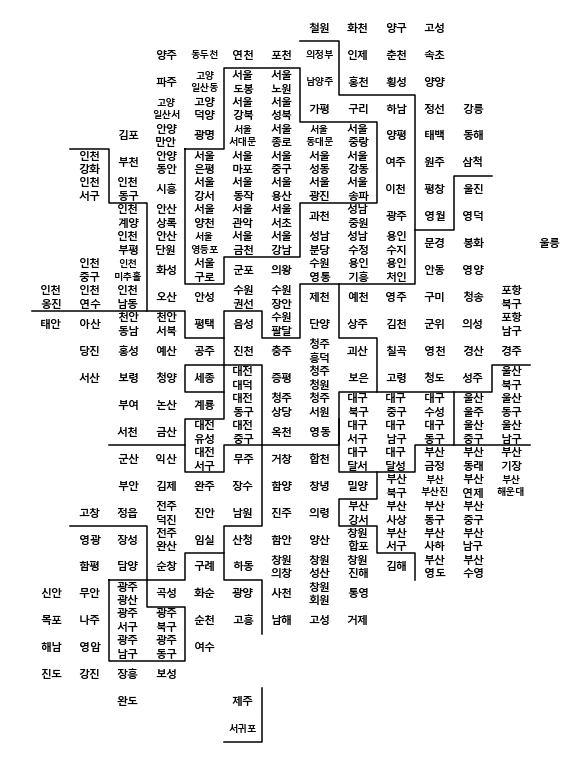

In [42]:
import module.korea 

In [48]:
# korea의 패키지 안에 있는 draw_korea 변수를 가져옴
from module.korea import draw_korea

In [49]:
set(cf['ID'].unique()) - set(draw_korea['ID'].unique())

{'세종특별자치', '수원', '안산', '용인', '창원', '창원 마산합포', '창원 마산회원', '포항 남', '포항 북'}

In [51]:
tmp_list = list(set(cf['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    cf = cf.drop(cf[cf['ID']==tmp].index)

print(set(cf['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [52]:
cf = pd.merge(cf, draw_korea, how='right', on=['ID'])
cf.head()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,ID,커피지수,y,x
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,0.294118,3,11
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),2.000000,0,10
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,1.000000,4,11
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,0.333333,5,11
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,0.500000,1,10


In [53]:
cf.fillna(0, inplace=True)
cf.tail()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,ID,커피지수,y,x
245,0,0,0.0,0.0,0.0,0.0,신안,0.0,21,0
246,0,0,0.0,0.0,0.0,0.0,화순,0.0,21,4
247,0,0,0.0,0.0,0.0,0.0,창원 회원,0.0,21,7
248,0,0,0.0,0.0,0.0,0.0,장흥,0.0,24,2
249,0,0,0.0,0.0,0.0,0.0,보성,0.0,24,3


In [54]:
cf.head()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,ID,커피지수,y,x
0,강원도,강릉시,2.0,5.0,15.0,0.0,강릉,0.294118,3,11
1,강원도,고성군,0.0,2.0,1.0,0.0,고성(강원),2.000000,0,10
2,강원도,동해시,1.0,1.0,1.0,1.0,동해,1.000000,4,11
3,강원도,삼척시,2.0,1.0,1.0,0.0,삼척,0.333333,5,11
4,강원도,속초시,0.0,4.0,8.0,0.0,속초,0.500000,1,10


In [55]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도명     250 non-null    object 
 1   시군구명    250 non-null    object 
 2   점포빽다방   250 non-null    float64
 3   점포스타벅스  250 non-null    float64
 4   점포이디아   250 non-null    float64
 5   점포커피빈   250 non-null    float64
 6   ID      250 non-null    object 
 7   커피지수    250 non-null    float64
 8   y       250 non-null    int64  
 9   x       250 non-null    int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 21.5+ KB


## 커피점 데이터 분석

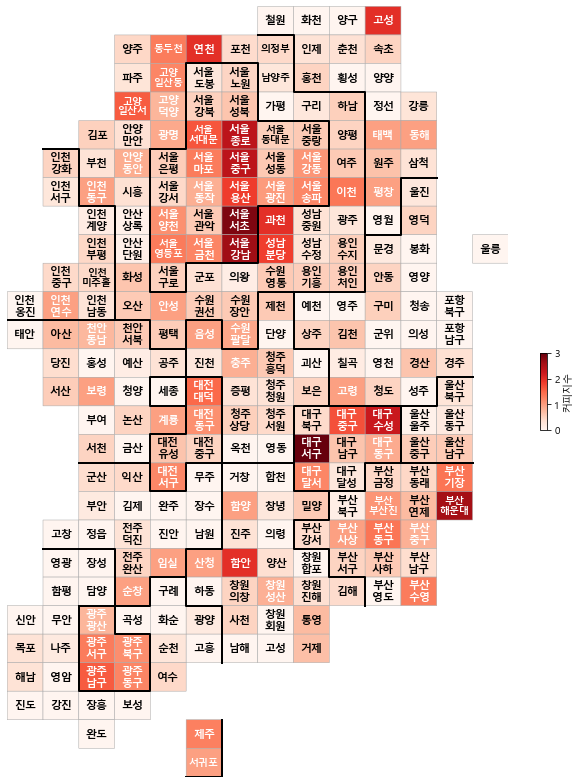

In [56]:
import module.drawKorea as dr
dr.drawKorea('커피지수', cf, 'Reds')

In [57]:
import folium
import json
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [58]:
cf_folium = cf.set_index('ID')
cf_folium.head()

,시도명,시군구명,점포빽다방,점포스타벅스,점포이디아,점포커피빈,커피지수,y,x
ID,,,,,,,,,
강릉,강원도,강릉시,2.0,5.0,15.0,0.0,0.294118,3,11
고성(강원),강원도,고성군,0.0,2.0,1.0,0.0,2.000000,0,10
동해,강원도,동해시,1.0,1.0,1.0,1.0,1.000000,4,11
삼척,강원도,삼척시,2.0,1.0,1.0,0.0,0.333333,5,11
속초,강원도,속초시,0.0,4.0,8.0,0.0,0.500000,1,10


In [59]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

In [60]:
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)

folium.Choropleth(geo_data = geo_data,
               data = cf_folium['커피지수'],
               columns = [cf_folium.index, cf_folium['커피지수']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
               
title_html = '<h3 align="center" style="font-size:20px"><b>커피지수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map